In [1]:
import numpy as np
import pandas as pd
bus_df = pd.read_csv("bus.csv", encoding = "euc-kr")
print(bus_df.shape)
bus_df.head()

(959, 15)


,Unnamed: 0,일자,구,일반승차인원,일반하차인원,일반환승인원,청소년승차인원,청소년하차인원,청소년환승인원,어린이승차인원,어린이하차인원,어린이환승인원,미분류승차인원,미분류하차인원,미분류환승인원
0,0,2023년 03월 01일,동구,100600,87257,21418,105494,90962,22254,101352,87904,21496,100732,87357,21418
1,1,2023년 03월 01일,서구,127262,110789,29925,135259,116997,31205,128399,111759,30057,127352,110845,29925
2,2,2023년 03월 01일,중구,74800,67462,14250,79516,70979,14776,75682,68218,14331,74844,67497,14250
3,3,2023년 03월 01일,대덕구,40925,36651,7453,43122,38227,7792,41254,36899,7469,40955,36676,7453
4,4,2023년 03월 01일,유성구,79446,73214,15782,84167,77167,16600,80264,73987,15906,79491,73248,15782


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
Y = bus_df[["일반승차인원"]]
X = bus_df[["청소년승차인원"]]

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [5]:
lr = LinearRegression()

In [6]:
lr.fit(X_train, Y_train)

LinearRegression()

In [7]:
Y_predict = lr.predict(X_test)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/sojaeyeong/빅데이터 자료 모음/.venv/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
  func(*args, **kwargs)
/Users/sojaeyeong/빅데이터 자료 모음/.venv/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  func(*args, **kwargs)
/Users/sojaeyeong/빅데이터 자료 모음/.venv/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  func(*args, **kwargs)
/Users/sojaeyeong/빅데이터 자료 모음/.venv/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  func(*args, **kwargs)
/Users/sojaeyeong/빅데이터 자료 모음/.venv/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  func(*ar

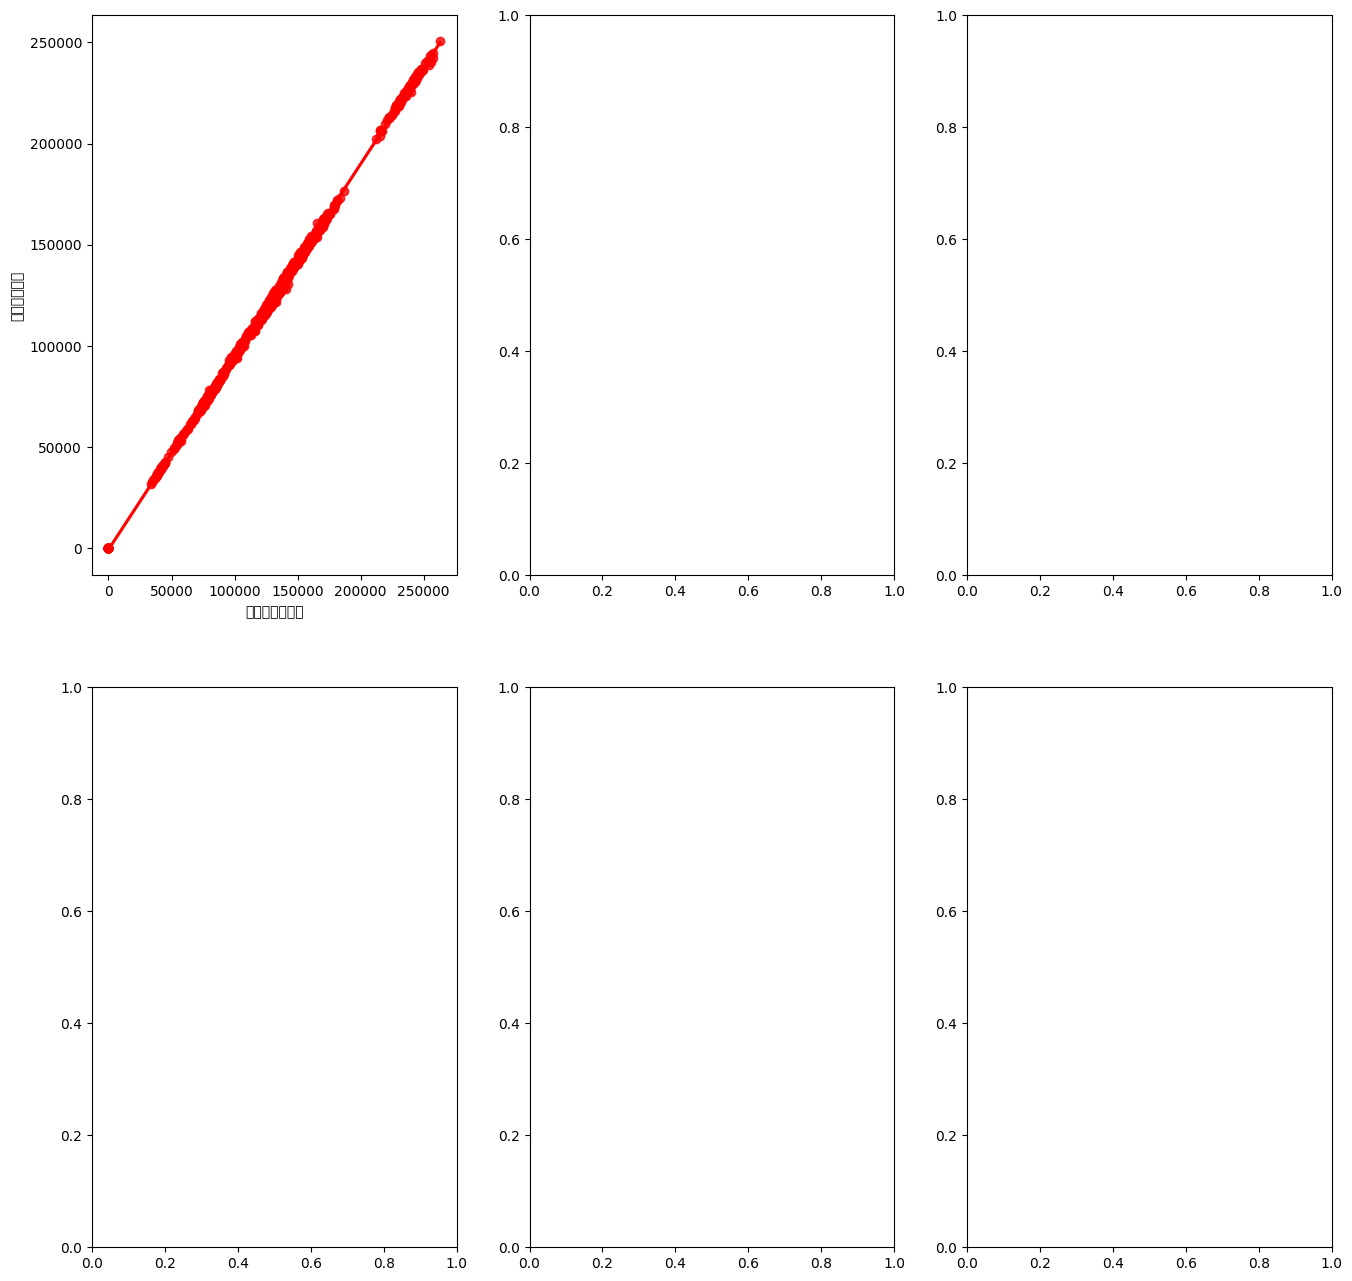

In [9]:
fig, axs = plt.subplots(figsize = (16, 16), ncols = 3, nrows = 2)
x_features = ["청소년승차인원"]
plot_color = ["r"]
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = feature, y = "일반승차인원", data = bus_df, ax = axs[row][col], color = plot_color[i])